In [1]:
from qc.word_generator import WordGenerator
from qc.bloch_matrix import *
from qutip import Bloch
from picos import RealVariable, Problem
import picos as pc

In [2]:
wg = WordGenerator(['H','T'], 6).generate_words_shorter_than()

In [3]:
m = get_bloch_matrices(wg, 0.95)
v = get_bloch_vectors(m, [1,0,0])

/home/jakub/Developer/qc/venv/lib/python3.9/site-packages/qutip/bloch.py:451: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  self.axes = Axes3D(self.fig, azim=self.view[0], elev=self.view[1])


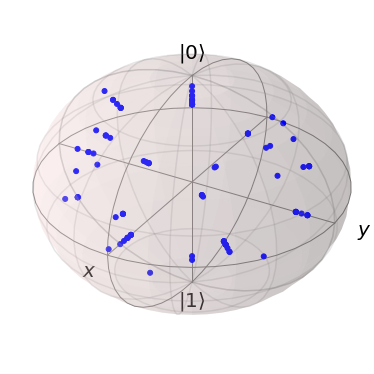

In [4]:
b = Bloch()
vx, vy, vz = np.transpose(v)
b.add_points([vx, vy, vz])
b.render()

In [5]:
problem = Problem()
N = len(v)
p = {}
rn0 = np.random.default_rng().normal(size=3)
n0 = rn0 /np.linalg.norm(rn0)

# dodaję zmienne
for i in range(N - 1):
    p[i] = problem.add_variable('p[{0}]'.format(i))
t = problem.add_variable('t')

# każde p >= 0
problem.add_list_of_constraints([p[i] >= 0 for i in range(N - 1)])
# p sumują się do 1
problem.add_constraint(1 == pc.sum([p[i] for i in range(N - 1)]))
# wiąz na wektory
problem.add_constraint(t * n0[0] == pc.sum([p[j] * v[j][0] for j in range(N - 1)]))
problem.add_constraint(t * n0[1] == pc.sum([p[j] * v[j][1] for j in range(N - 1)]))
problem.add_constraint(t * n0[2] == pc.sum([p[j] * v[j][2] for j in range(N - 1)]))  

problem.set_objective("max", t)

<ipython-input-5-e6216b518dc1>:9: DeprecationWarning: Problem.add_variable is deprecated: Variables can now be created independent of problems, and do not need to be added to any problem explicitly.
  p[i] = problem.add_variable('p[{0}]'.format(i))
<ipython-input-5-e6216b518dc1>:10: DeprecationWarning: Problem.add_variable is deprecated: Variables can now be created independent of problems, and do not need to be added to any problem explicitly.
  t = problem.add_variable('t')


In [6]:
solution = problem.solve(solver='mosek')

In [8]:
print(t, n0)

0.7525813622648464 [-0.24416783  0.21191973  0.94629387]


In [13]:
for i in range(N - 1):
    print(p[i])


0.0
0.5660764497962092
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.15941221613357548
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.2745113340702154
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
